In [1]:
import torch
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from torch.distributions.multivariate_normal import MultivariateNormal

In [2]:
def set_seeds(seed_int):
    # Reproducibility
    # Infos from here: https://pytorch.org/docs/stable/notes/randomness.html
    # Set Seeds for Torch, Numpy and Python
    torch.manual_seed(seed_int)
    np.random.seed(seed_int)
    random.seed(seed_int)

In [3]:
def create_data(sample_num=2000):
    loc = torch.zeros(3)
    lam = torch.Tensor([[1, 0, 0],
                        [3, 1, 0],
                        [0, 0, 1]])
    scale = lam @ torch.eye(3) @ torch.transpose(lam, 0, 1)
    y_distribution = MultivariateNormal(loc, scale)
    y = y_distribution.sample((sample_num, 1))  # Generate training data
    log_likelihood = y_distribution.log_prob(y)
    y = y.reshape((sample_num, 3))

    return y,log_likelihood

In [4]:
from itertools import combinations

def density_plots(data):
    num_cols = data.shape[1]
    fig, axs = plt.subplots(nrows=1, ncols=num_cols, figsize=(15,5),
                            gridspec_kw={'wspace':0.0, 'hspace':0.0},sharey=True)
    a=0
    for i, j in combinations(range(num_cols), 2):
        if i != j:
            sns.kdeplot(ax=axs[a], x=data[:, j], y=data[:, i])
            a+=1
    plt.subplots_adjust(wspace=0.05)

    return fig

def plot_latent_space(z):
    fig = density_plots(z)
    return fig

In [19]:
def point_plots(data):
    num_cols = data.shape[1]
    fig, axs = plt.subplots(nrows=1, ncols=num_cols, figsize=(15,5),
                            gridspec_kw={'wspace':0.0, 'hspace':0.0},sharey=True)
    a=0
    for i, j in combinations(range(num_cols), 2):
        if i != j:
            axs[a].plot(data[:, j], data[:, i], "o")
            a+=1
    plt.subplots_adjust(wspace=0.05)

    return fig

1
2
3
4
5
6
7
8
9
10


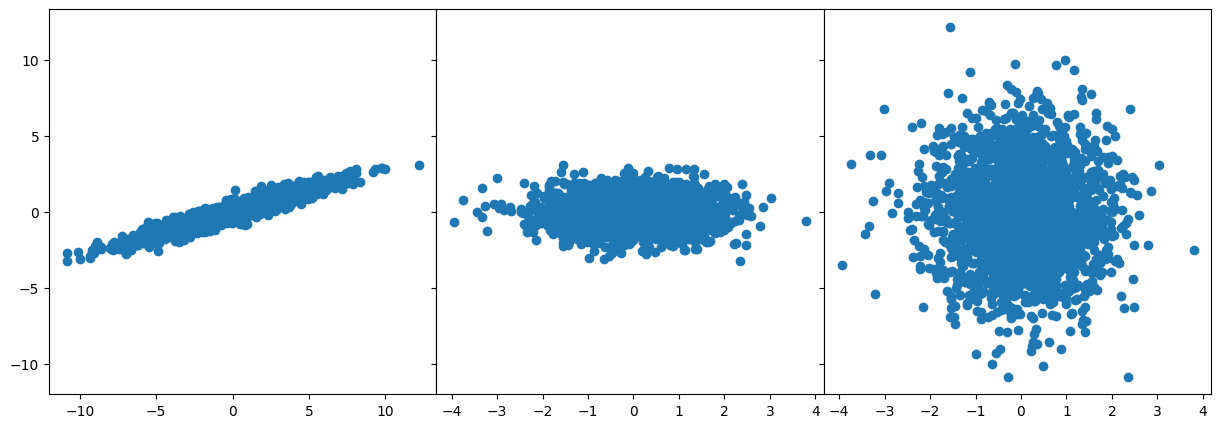

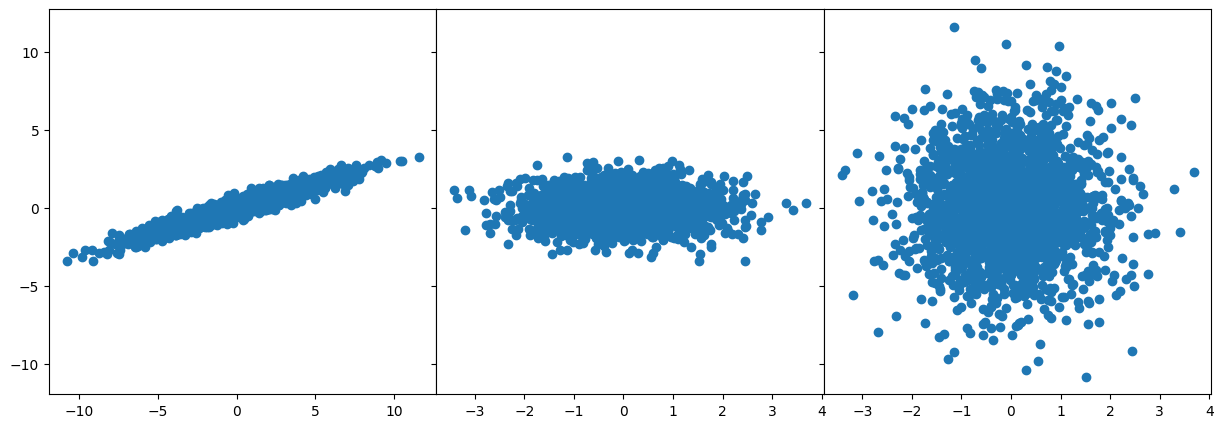

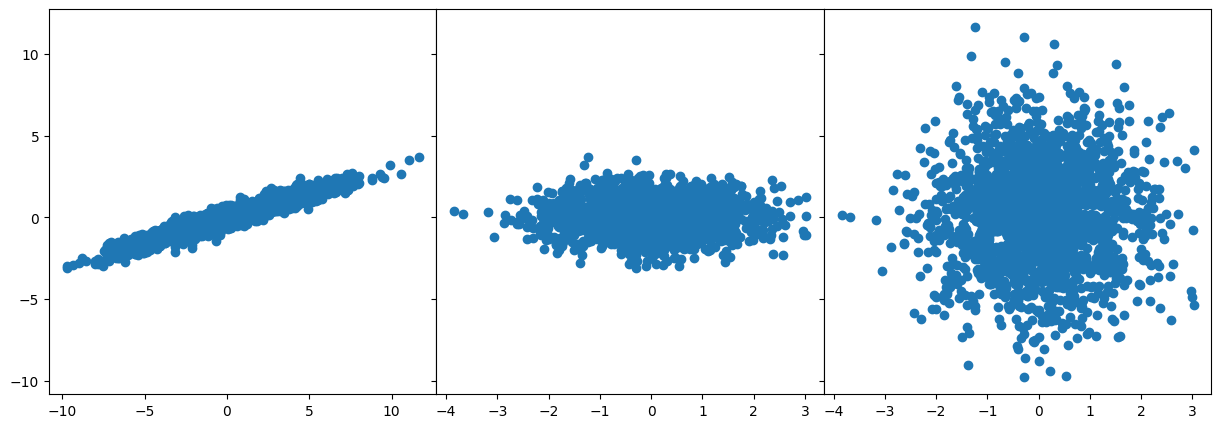

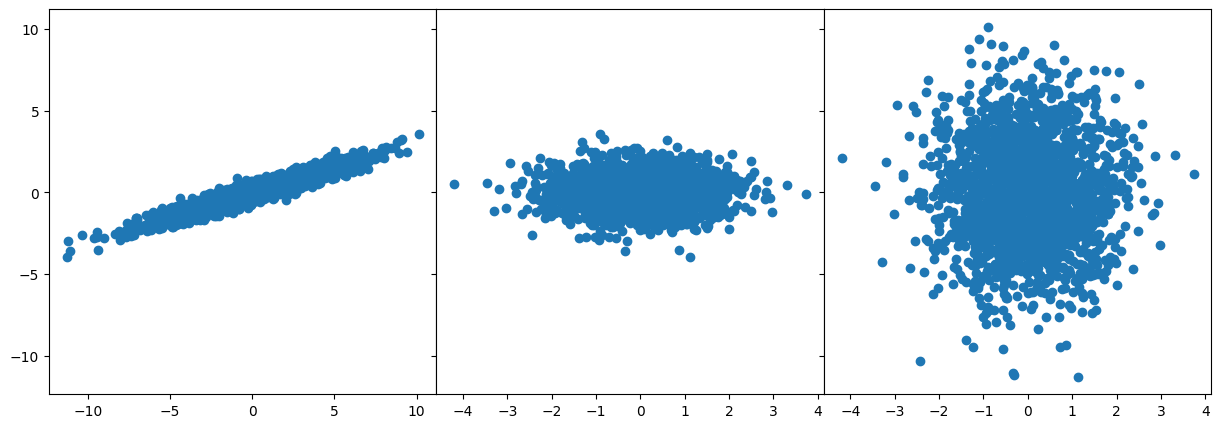

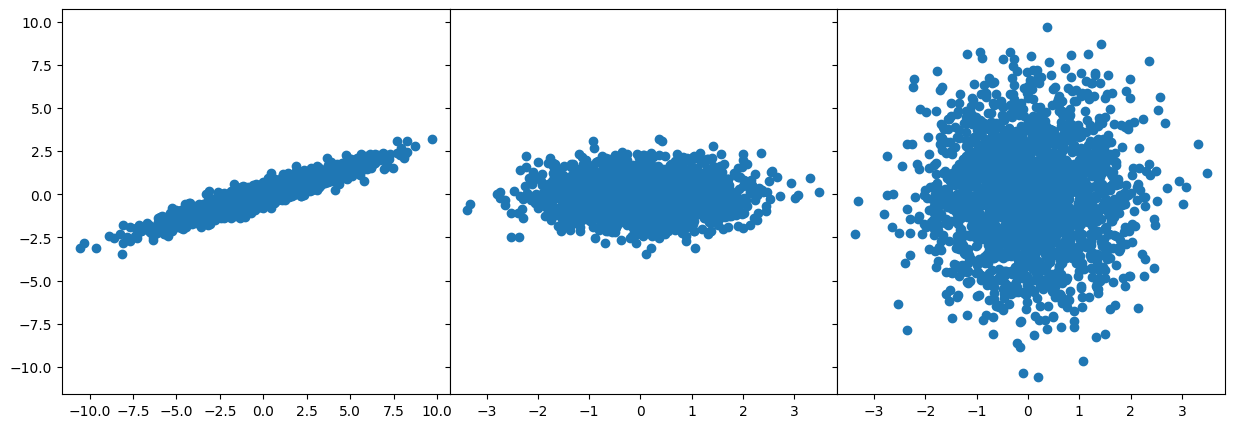

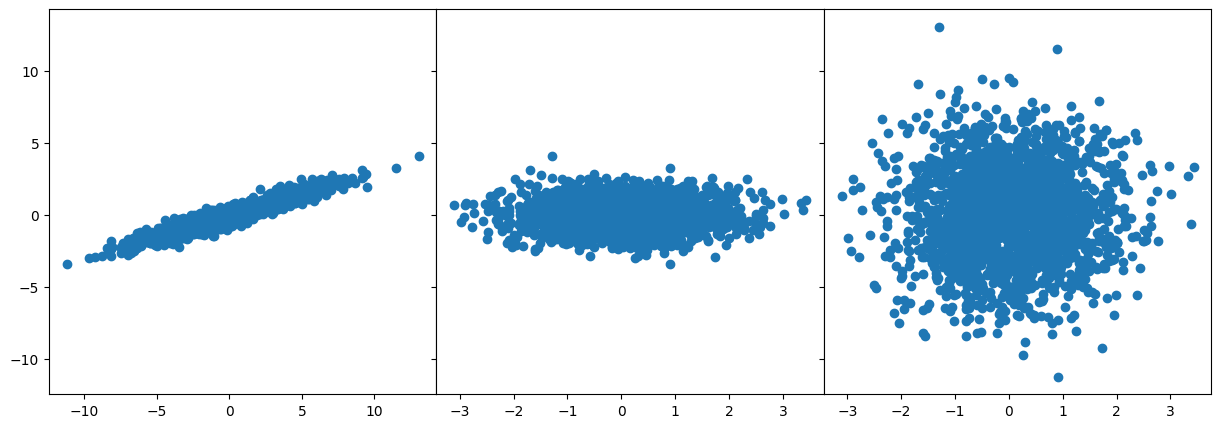

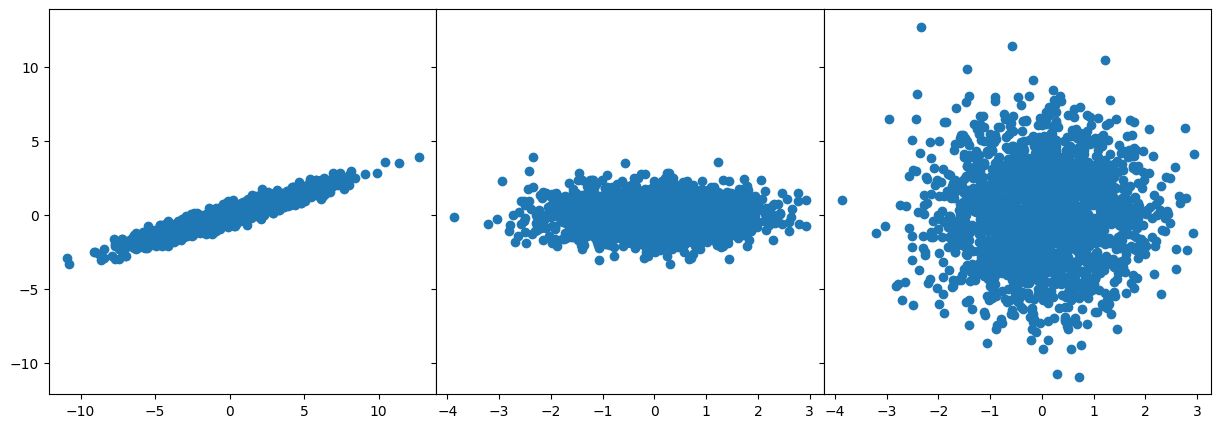

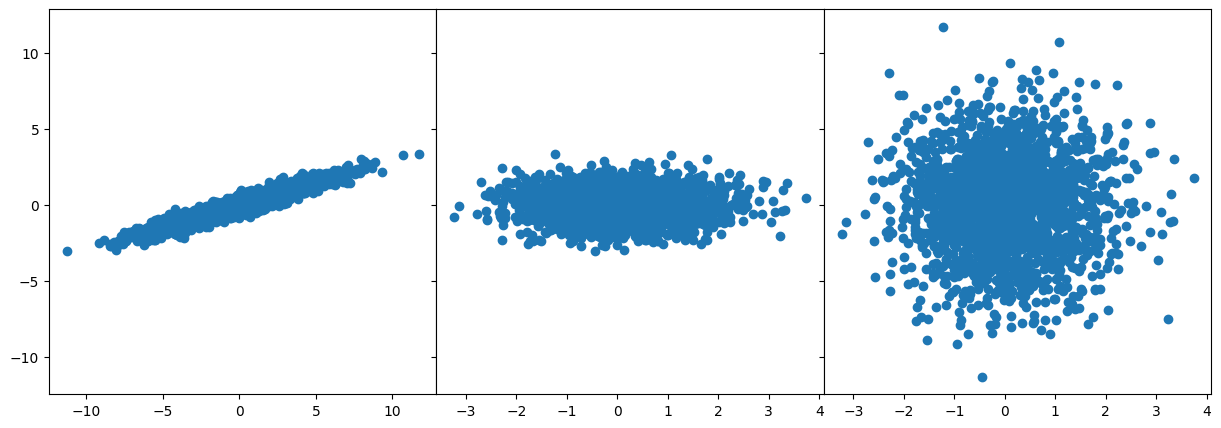

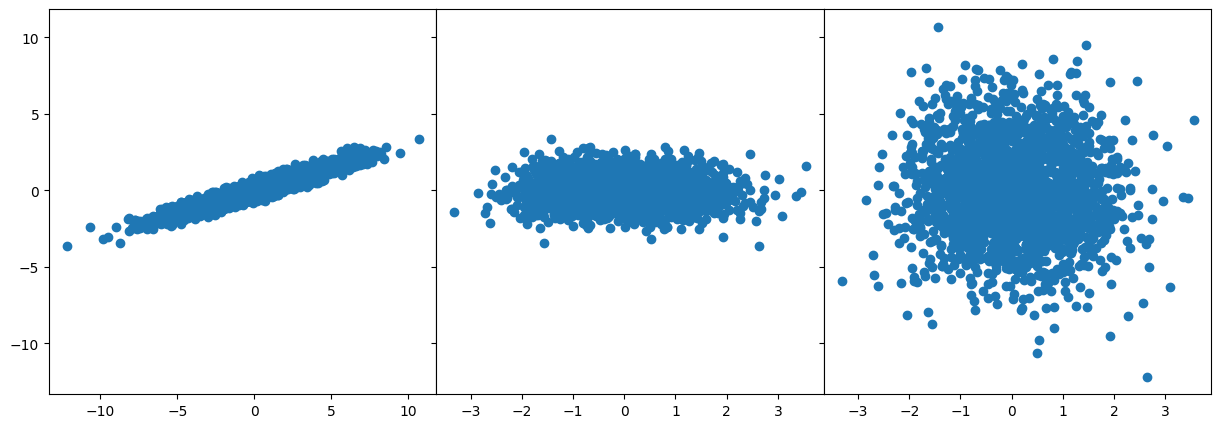

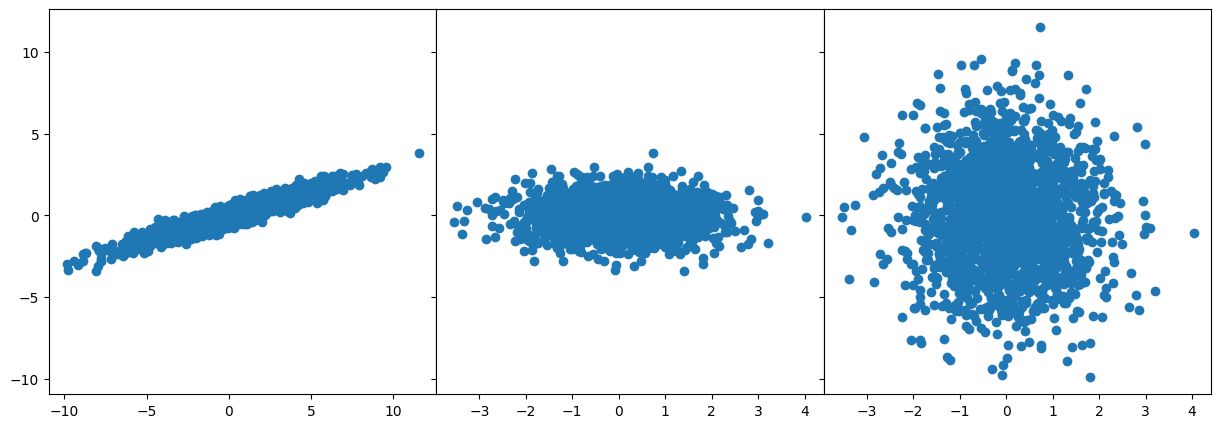

In [20]:
for seed_value in range(1,11):
    set_seeds(seed_value)
    y, train_likelihood = create_data(2000)

    print(seed_value)
    point_plots(y)